In [1]:
import numpy as np
import matplotlib.pyplot as plt

Usaremos el estimador de 2PCF de Landy y Szalay

In [17]:
# medidas del cubo
Lado = 1
Num = 500
Dim = 2

#generamos dos arreglos aleatorios de 0 a Lado y con Num puntos, además de dimension Dim
rand_a = np.zeros((Num,Dim))
rand_b = np.zeros((Num,Dim))

for i in range(Num):
    rand_a[i] = np.random.uniform(0,Lado,Dim)
    rand_b[i] = np.random.uniform(0,Lado,Dim)    

In [13]:
#distancia entre el punto j y cada uno de los puntos de b 
def dist(a,b):
    dist = []
    #este ciclo for itera para el punto j=1 del arreglo a, el primer punto, j-b es un arreglo
    # que contiene las distancias de ese punto a cada uno de los puntos de b
    #posteriormente se guardan todas esas distancias en un arreglo "D_ab" de una dimension 
    #en la siguiente iteracion se fija en otro punto j=2 de a y calcula la distancia j - b de este
    #nuevo punto a cada uno de los puntos de b, se agregan todos estos puntos a nuestro arreglo
    #de distancias "D_ab"
    for j in a:
        D_ia = j-a
        D_ab = np.linalg.norm(D_ia,axis=1)
        dist.extend(D_ab)
    return np.array(dist)

#funcion de correlacion
def corr(a,b,bins):
    
    DD = dist(a,a)
    rD = np.linspace(0,np.max(DD),bins)
    
    RR = dist(b,b)
    rR = np.linspace(0,np.max(RR),bins)
    
    DR = dist(a,b)
    rDR = np.linspace(0,np.max(DR),bins)
    
    xi = []
    
    for i in range(bins-1):
    #son len porque estamos contando cuantos caben en ese rango de r a r + dr
        NDD = len(DD[(DD >= rD[i]) & (DD <= rD[i+1])])
        NRR = len(RR[(RR >= rR[i]) & (RR <= rR[i+1])])
        NDR = len(DR[(DR >= rDR[i]) & (DR <= rDR[i+1])])
        xi.append(   NDD/(NRR)  -   2*NDR/(NRR)   +   1   )

    #solo podremos generar 'bins -1' puntos porque necesitamos a i y a i+1 en el ciclo for    
    return rD[:bins-1],np.array(xi)

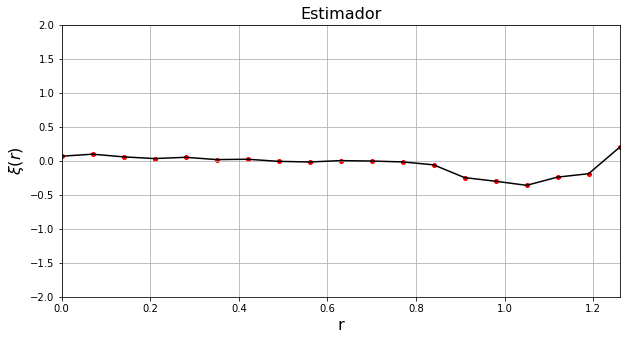

In [19]:
r,xi = corr(rand_a,rand_b,20)


fig = plt.figure(figsize=(10,5))
plt.scatter(r,xi, s=16, c='red')
plt.plot(r,xi,'k-')
plt.xlim(np.min(r),np.max(r))
plt.ylim(-2,2)
plt.xlabel('r',fontsize=16)
plt.ylabel('$\u03BE(r)$',fontsize=16)
plt.title('Estimador',fontsize=16)
plt.grid();